In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
data = pd.read_csv('Tweets.csv')

In [24]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [26]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [27]:
data.shape

(14640, 15)

In [28]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [29]:
data.duplicated().sum()

36

In [ ]:
data.drop_duplicates()

In [30]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [31]:
data.drop(columns=['airline_sentiment_gold','negativereason_gold','retweet_count'], inplace=True)

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

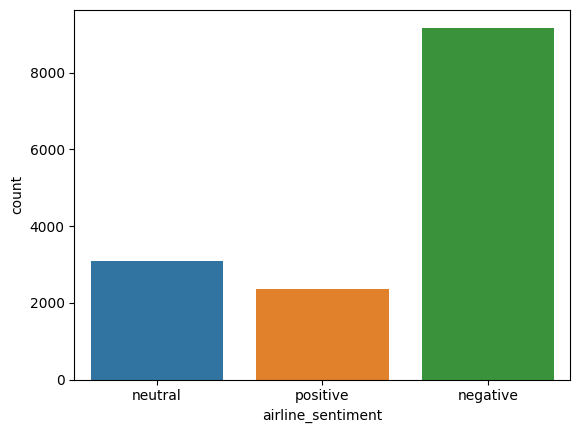

In [32]:
sns.countplot(x="airline_sentiment", data=data)

In [48]:
import re
data['text'] 
#= ["This is an example sentence!", "It includes special characters: @#$%"]

# Define a function to remove special characters using regex
def remove(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the text column
data['text'] = data['text'].apply(remove)

print(data['text'])

0                         VirginAmerica What dhepburn said
1        VirginAmerica plus youve added commercials to ...
2        VirginAmerica I didnt today Must mean I need t...
3        VirginAmerica its really aggressive to blast o...
4        VirginAmerica and its a really big bad thing a...
                               ...                        
14635    AmericanAir thank you we got on a different fl...
14636    AmericanAir leaving over 20 minutes Late Fligh...
14637    AmericanAir Please bring American Airlines to ...
14638    AmericanAir you have my money you change my fl...
14639    AmericanAir we have 8 ppl so we need 2 know ho...
Name: text, Length: 14640, dtype: object


In [49]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Example original text column
data['text'] 
# Function to preprocess text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization using NLTK
    tokens = word_tokenize(text)
    
    # Remove stopwords using NLTK
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Lemmatization using WordNet
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join tokens back to a string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Add a new column 'preprocessed' with preprocessed text
data['preprocessed'] = data['text'].apply(preprocess_text)

print(data[['text', 'preprocessed']])
data['preprocessed'][1]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                    text  \
0                       VirginAmerica What dhepburn said   
1      VirginAmerica plus youve added commercials to ...   
2      VirginAmerica I didnt today Must mean I need t...   
3      VirginAmerica its really aggressive to blast o...   
4      VirginAmerica and its a really big bad thing a...   
...                                                  ...   
14635  AmericanAir thank you we got on a different fl...   
14636  AmericanAir leaving over 20 minutes Late Fligh...   
14637  AmericanAir Please bring American Airlines to ...   
14638  AmericanAir you have my money you change my fl...   
14639  AmericanAir we have 8 ppl so we need 2 know ho...   

                                            preprocessed  
0                            virginamerica dhepburn said  
1      virginamerica plus youve added commercial expe...  
2      virginamerica didnt today must mean need take ...  
3      virginamerica really aggressive blas

'virginamerica plus youve added commercial experience tacky'

In [50]:
data['text'][1]

'VirginAmerica plus youve added commercials to the experience tacky'

In [51]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [52]:
# Label encode the target variable
label_encoder = preprocessing.LabelEncoder()
data['airline_sentiment'] = label_encoder.fit_transform(data['airline_sentiment'])

In [53]:
# Create feature matrix X and target vector y
X = data['preprocessed']
y = data['airline_sentiment']

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Initialize a TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [56]:
# Initialize an SVM classifier
clf = SVC()

In [57]:
# Train the SVM classifier on the training data
clf.fit(X_train_tfidf, y_train)

SVC()

In [58]:
# Make predictions on the test data
y_pred_test = clf.predict(X_test_tfidf)

In [59]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      1889
           1       0.71      0.43      0.54       580
           2       0.80      0.61      0.69       459

    accuracy                           0.80      2928
   macro avg       0.77      0.66      0.70      2928
weighted avg       0.79      0.80      0.78      2928



In [60]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.5, 1.0]
}


In [61]:
# Initialize an SVM model
model = SVC()

In [62]:
# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

In [63]:
# Fit the grid search object
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.5, 1.0],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [64]:
# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'linear'}


In [65]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [66]:
# Evaluate the best model on the test data
best_model_accuracy = best_model.score(X_test_tfidf, y_test)
print("Best Model Accuracy:", best_model_accuracy)

Best Model Accuracy: 0.8015710382513661
